## Importing packages

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
import networkx as nx
import itertools
import random
from scipy.stats import kde

## Loading file of network

In [2]:
#network of American football games between Division IA colleges during regular season Fall 2000
# http://www-personal.umich.edu/~mejn/netdata/

# reading the network file
#g_original = ig.Graph.Read_Edgelist('ENZYMES_g295.edges')
g_original = ig.Graph.Read_GML('football.gml')

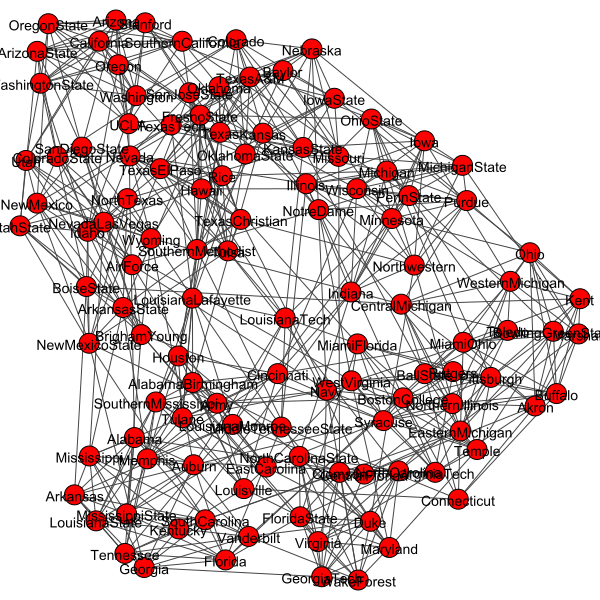

In [3]:
ig.plot(g_original)

In [4]:
nodes_g = len(g_original.vs) # original number of nodes
links_g = len(g_original.es) # original number of links

In [5]:
nodes_g

115

In [6]:
links_g

613

In [7]:
paths_original=[]
for i in range(nodes_g):
    path = g_original.shortest_paths(i)
    [paths_original.append(k) for k in path[0]]

In [9]:
len(paths_original)

13225

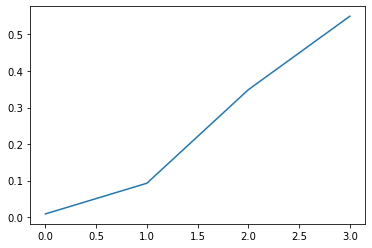

In [33]:
paths_original=np.array(paths_original)
low,high = paths_original.min(),paths_original.max()
bins = np.linspace(low,high,high-low+1)

hist, bin_edges = np.histogram(paths_original, bins=bins, density=True)
plt.plot(bin_edges[:-1], hist)

## Generating the random network via $G(N,l)$

In [11]:
def generate_random_graph_l(N, l):
    G = ig.Graph() #creating the graph
    G.add_vertices(N)  #adding the number nodes
    
    possible_edges = itertools.combinations(G.vs, 2) #creating the all edges
    edges = random.sample(list(possible_edges),l) #getting the random sample of possible edges
    G.add_edges(edges) #add the following edge
        
    return G

In [12]:
g_random = generate_random_graph_l(nodes_g,links_g)

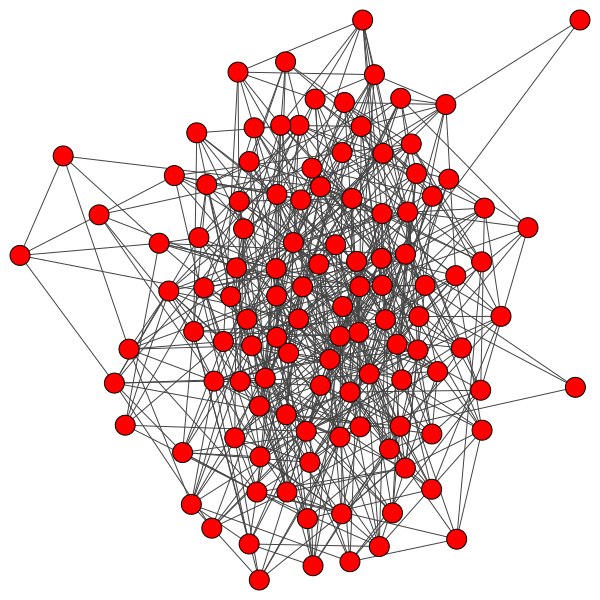

In [13]:
ig.plot(g_random)

In [14]:
paths_random=[]
for i in range(nodes_g):
    path = g_random.shortest_paths(i)
    [paths_random.append(k) for k in path[0]]

In [15]:
len(paths_random)

13225

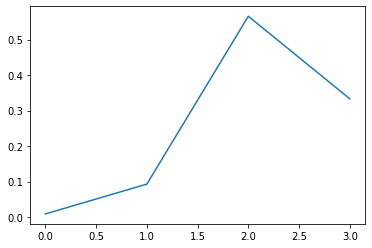

In [16]:
hist_r, bin_edges_r = np.histogram(paths_random, bins=4, density=True)

plt.plot(bin_edges_r[:-1], hist_r)

## Generating degree preserving randomization

In [17]:
G = nx.random_degree_sequence_graph(g_original.vs.degree(),seed=5)

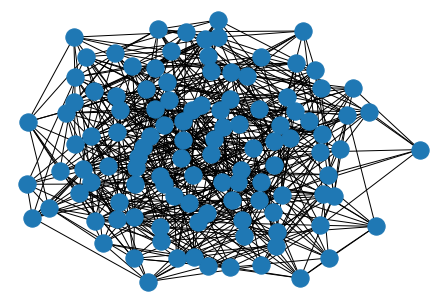

In [18]:
nx.draw(G)

In [19]:
paths_dpr=[]
for i in range(nodes_g):
    path = list(nx.shortest_path_length(G,source=i).values())  
    paths_dpr.extend(path)

In [20]:
len(paths_dpr)

13225

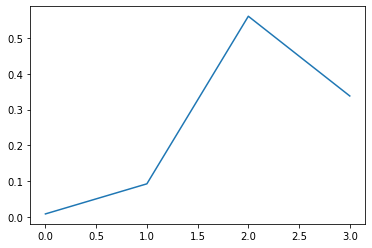

In [21]:
hist_dpr, bin_edges_dpr = np.histogram(paths_dpr, bins=4, density=True)

plt.plot(bin_edges_dpr[:-1], hist_dpr)

## Generating all plots together

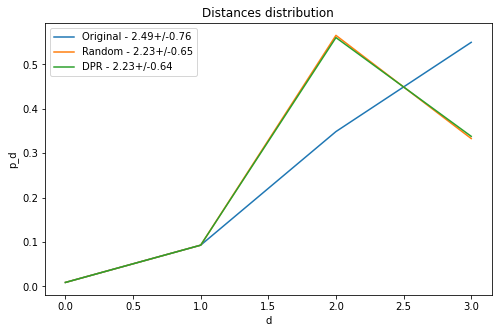

In [22]:
plt.figure(figsize=(8,5))
plt.title('Distances distribution')
plt.xlabel('d')
plt.ylabel('p_d')

mean_original= round(np.array(paths_original).mean(),2)
std_original= round(np.array(paths_original).std(),2)

mean_random= round(np.array(paths_random).mean(),2)
std_random= round(np.array(paths_random).std(),2)

mean_dpr= round(np.array(paths_dpr).mean(),2)
std_dpr= round(np.array(paths_dpr).std(),2)

plt.plot(bin_edges[:-1], hist)
plt.plot(bin_edges_r[:-1], hist_r)
plt.plot(bin_edges_dpr[:-1], hist_dpr)

plt.legend(['Original - ' + str(mean_original) + '+/-' + str(std_original),
            'Random - ' + str(mean_random) + '+/-' + str(std_random),
            'DPR - ' + str(mean_dpr) + '+/-' + str(std_dpr)])

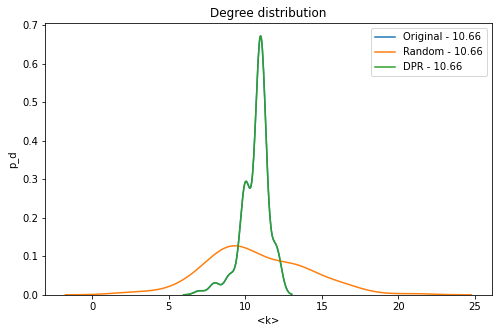

In [24]:
plt.figure(figsize=(8,5))
plt.title('Degree distribution')
plt.xlabel('<k>')
plt.ylabel('p_d')

d_orig = round(np.array(g_original.degree()).mean(),2)
d_rand = round(np.array(g_random.degree()).mean(),2)
d_dpr = round(np.array(list(dict(G.degree()).values())).mean(),2)

sns.kdeplot(g_original.degree())
sns.kdeplot(g_random.degree())
sns.kdeplot(dict(G.degree()).values())
plt.legend(['Original - ' + str(d_orig),
            'Random - ' + str(d_rand),
            'DPR - ' + str(d_dpr)])

Observando primeiramente a distribuições das distâncias mínimas percebe-se que as duas formas de rede (original, randômica e preservação de graus randômica (DPR)) apresentam a mesma distribuições de distâncias com distâncias média de aproximadamente 2.23. Isto significa que o caminho mínimo entre todos os nós, ou seja, é possível alcançar todos os nós com uma distância de 2 com uma probabilidade acima de 50%. Uma distância baixa para este tipo de rede. Até mesmo na rede criada de forma randômica, a distância não variou. Esta distribuição de distância divergiu um pouco em relação ao resultado esperado, devido a inconsistências na geração dos gráficos.

Quando se observa as distribuições de graus dos nós, percebe-se que o grau médio de ambas as redes ficam em torno de 10. O que difere entre as redes são as "caudas" de suas distribuições. A rede original apresenta valores de grau médio bem mais centrados em relação a média com uma probabilidade em torno de 25%. A rede randômica apresenta uma "cauda" mais alongada para o lado direito, indicando valores maiores de grau médio na sua distribuição. Quanto a rede de preservação de graus randômica apresenta a mesma distribuição de graus médio da original, o que era esperado, pois a distribuição de grau permanece a mesma, porém são as arestas que sofrem uma distribuição diferente em relação às arestas originais. Por isso, o plot das duas curvas se coincidem.

Logo, a rede original utilizada aqui não se modificou tanto em relação às suas versões aleatória e DPR. Apesar de sua versão randômica apresentar mais nós com graus altos, a média permaneceu a mesma. O mesmo pode ser considerado para as distâncias mínimas. Um fator a ser levado em conta pode ser a quantidade pequena de nós e links da rede original. Pode ser que uma rede com um número maior de nós e links sofra mais alterações em relação às outras formas de geração e seja possível observar as características de redes livre de escala.